**NOTEBOOK 11**

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0,   \\  
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model represent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

**11.1 - LINEAR FIT**

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [1]:
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import Adam


plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"]= (10,8)
warnings.filterwarnings("ignore")

2024-09-28 16:55:10.860639: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-28 16:55:10.907262: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 16:55:10.907297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 16:55:10.908490: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 16:55:10.915391: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-28 16:55:10.915927: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
def linear(x):
    return (2*x+1)

**MODEL 1 -- sigma = 0.4, epochs = 15, N_train = 1000**

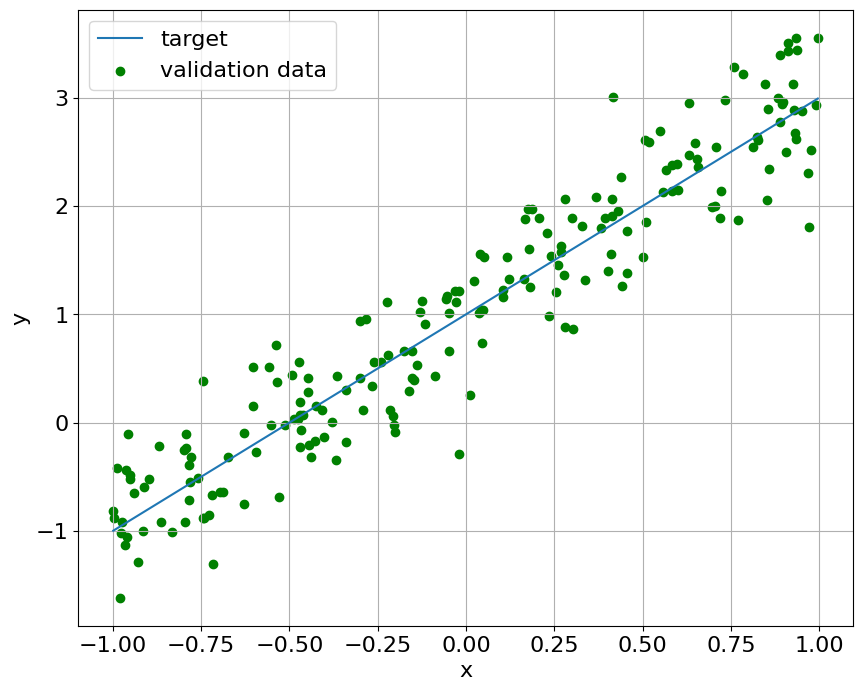

In [3]:
# generate training inputs
np.random.seed(0)
x_training = np.random.uniform(-1, 1, 1000)
x_validation = np.random.uniform(-1, 1, 200)
x_validation.sort()
y_target = linear(x_validation)

sigma = 0.4 # noise standard deviation
y_training = np.random.normal(linear(x_training), sigma) #Generation of the measures
y_validation = np.random.normal(linear(x_validation), sigma)

# plot validation and target dataset
plt.plot(x_validation, y_target, label='target')
plt.scatter(x_validation, y_validation, color='g', label='validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# compose the NN model exploiting TensorFlow and Keras
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #FIX the optimizer, the loss function and the metrics

# fit the model using training dataset
# over 15 epochs of 32 batch size each
history = model.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=15,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_validation, y_validation))
model.get_weights()

Epoch 1/15
32/32 [==============================] - 0s 7ms/step - loss: 3.4599 - mse: 3.4599 - val_loss: 2.7962 - val_mse: 2.7962
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 2.0917 - mse: 2.0917 - val_loss: 1.7557 - val_mse: 1.7557
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 1.3442 - mse: 1.3442 - val_loss: 1.1606 - val_mse: 1.1606
Epoch 4/15
32/32 [==============================] - 0s 3ms/step - loss: 0.9038 - mse: 0.9038 - val_loss: 0.7988 - val_mse: 0.7988
Epoch 5/15
32/32 [==============================] - 0s 3ms/step - loss: 0.6324 - mse: 0.6324 - val_loss: 0.5735 - val_mse: 0.5735
Epoch 6/15
32/32 [==============================] - 0s 3ms/step - loss: 0.4623 - mse: 0.4623 - val_loss: 0.4298 - val_mse: 0.4298
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 0.3534 - mse: 0.3534 - val_loss: 0.3351 - val_mse: 0.3351
Epoch 8/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2816 - mse: 0.28

[array([[1.8866606]], dtype=float32), array([1.0072042], dtype=float32)]

In [5]:
# evaluate model 
score = model.evaluate(x_validation, y_validation, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.1669 - mse: 0.1669

Test loss: 0.16694064438343048
Test accuracy: 0.16694064438343048


7/7 [==============================] - 0s 2ms/step


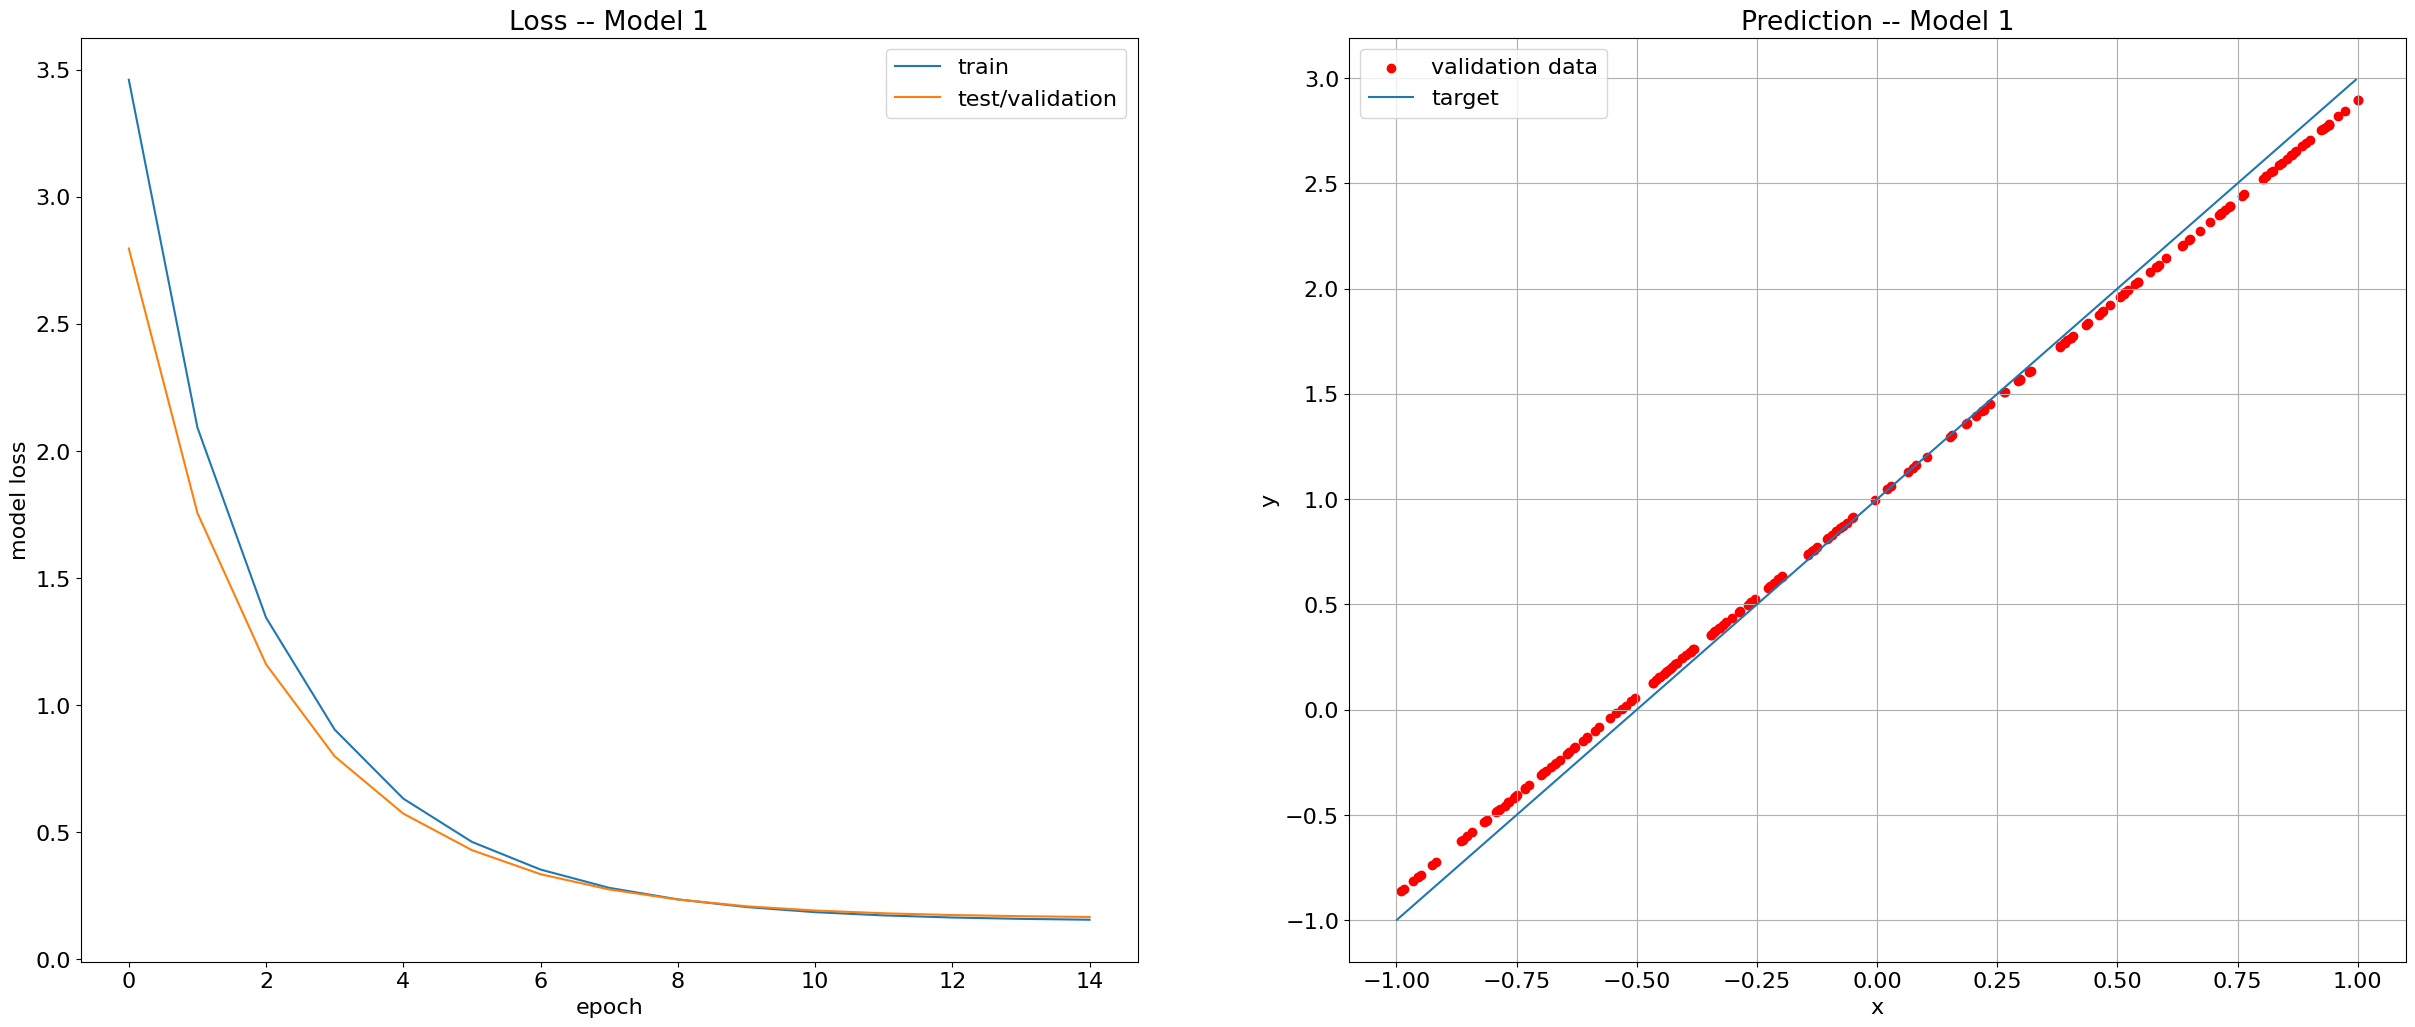

In [6]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Loss -- Model 1')

x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
ax1.scatter(x_predicted, y_predicted,color='r', label="validation data")
ax1.plot(x_validation, y_target, label='target')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.set_title('Prediction -- Model 1')
ax1.grid(True)
plt.show()


**MODEL 2 -- sigma = 0.5, epochs = 30, N_train = 800**

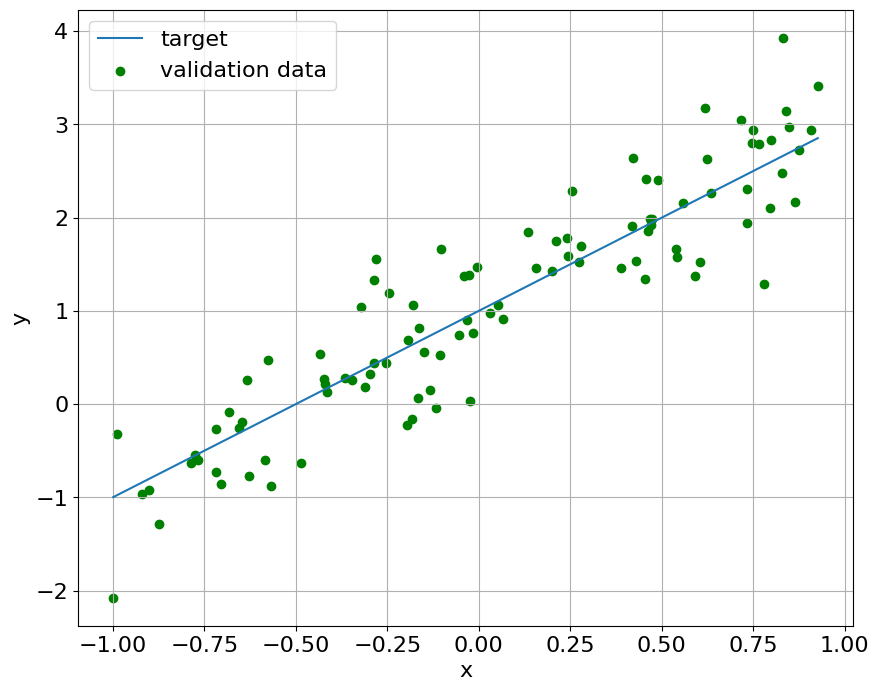

In [7]:
# generate training inputs
np.random.seed(0)
x_training = np.random.uniform(-1, 1, 800)
x_validation = np.random.uniform(-1, 1, 100)
x_validation.sort()
y_target = linear(x_validation)

sigma = 0.5 # noise standard deviation
y_training = np.random.normal(linear(x_training), sigma) #Generation of the measures
y_validation = np.random.normal(linear(x_validation), sigma)

# plot validation and target dataset
plt.plot(x_validation, y_target, label='target')
plt.scatter(x_validation, y_validation, color='g', label='validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# compose the NN model exploiting TensorFlow and Keras
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #FIX the optimizer, the loss function and the metrics

# fit the model using training dataset
# over 15 epochs of 32 batch size each
history = model.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_validation, y_validation))
model.get_weights()

Epoch 1/30
25/25 [==============================] - 0s 7ms/step - loss: 3.4972 - mse: 3.4972 - val_loss: 2.8397 - val_mse: 2.8397
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 2.3487 - mse: 2.3487 - val_loss: 1.9536 - val_mse: 1.9536
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 1.6605 - mse: 1.6605 - val_loss: 1.4133 - val_mse: 1.4133
Epoch 4/30
25/25 [==============================] - 0s 9ms/step - loss: 1.2181 - mse: 1.2181 - val_loss: 1.0619 - val_mse: 1.0619
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.9215 - mse: 0.9215 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.7170 - mse: 0.7170 - val_loss: 0.6604 - val_mse: 0.6604
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.5438 - val_mse: 0.5438
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4730 - mse: 0.47

[array([[1.9761473]], dtype=float32), array([1.0112151], dtype=float32)]

In [9]:
# evaluate model 
score = model.evaluate(x_validation, y_validation, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.2393 - mse: 0.2393

Test loss: 0.23933757841587067
Test accuracy: 0.23933757841587067


4/4 [==============================] - 0s 2ms/step


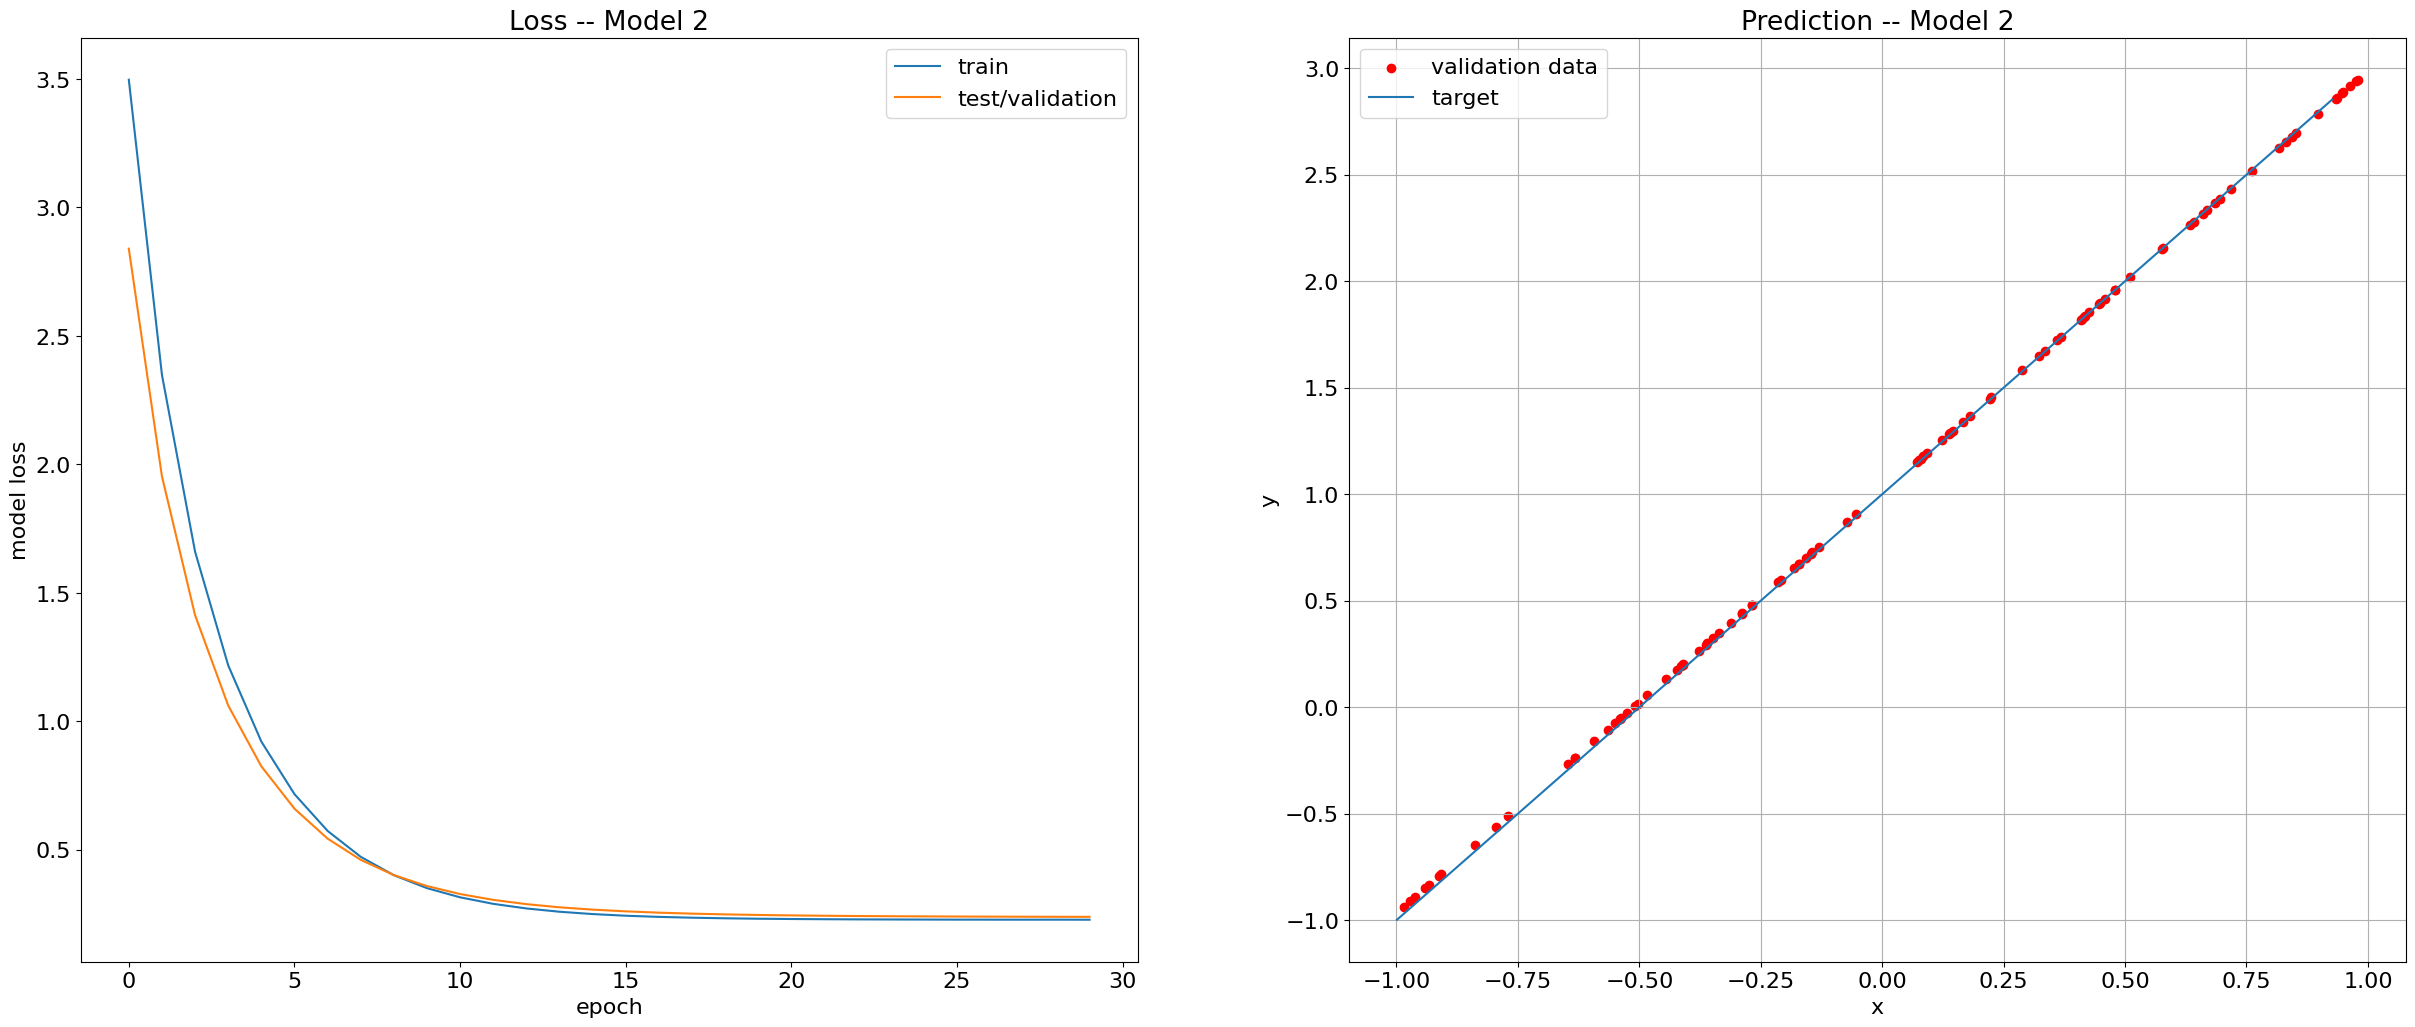

In [10]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Loss -- Model 2')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax1.scatter(x_predicted, y_predicted,color='r', label="validation data")
ax1.plot(x_validation, y_target, label='target')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.set_title('Prediction -- Model 2')
ax1.grid(True)
plt.show()


**MODEL 3 -- sigma = 0.1, epochs = 20, N_train = 400**

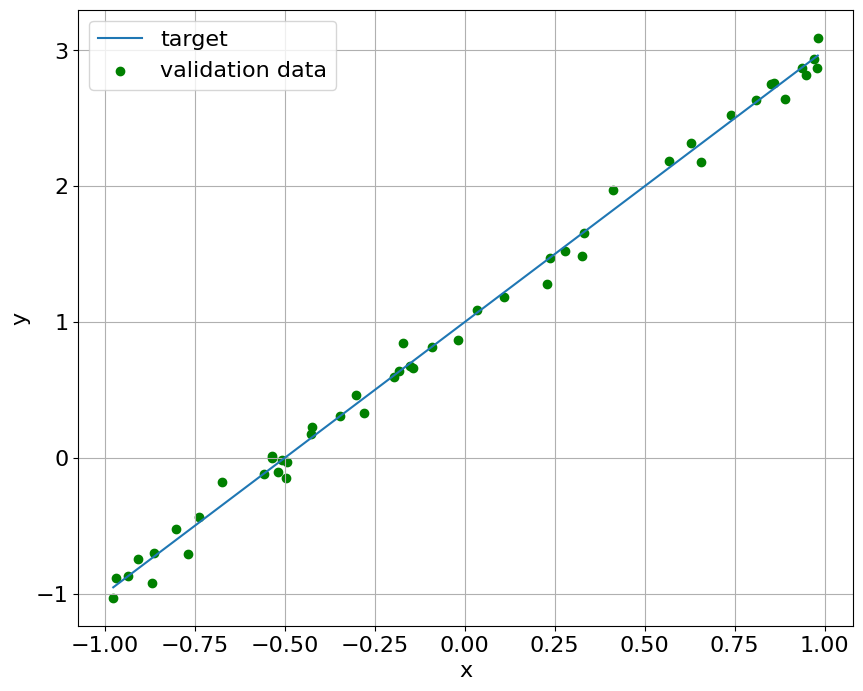

In [11]:
# generate training inputs
np.random.seed(0)
x_training = np.random.uniform(-1, 1, 400)
x_validation = np.random.uniform(-1, 1, 50)
x_validation.sort()
y_target = linear(x_validation)

sigma = 0.1 # noise standard deviation
y_training = np.random.normal(linear(x_training), sigma) #Generation of the measures
y_validation = np.random.normal(linear(x_validation), sigma)

# plot validation and target dataset
plt.plot(x_validation, y_target, label='target')
plt.scatter(x_validation, y_validation, color='g', label='validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# compose the NN model exploiting TensorFlow and Keras
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #FIX the optimizer, the loss function and the metrics

# fit the model using training dataset
# over 15 epochs of 32 batch size each
history = model.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_validation, y_validation))
model.get_weights()

Epoch 1/20
13/13 [==============================] - 0s 12ms/step - loss: 3.3509 - mse: 3.3509 - val_loss: 3.2222 - val_mse: 3.2222
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 2.6296 - mse: 2.6296 - val_loss: 2.6034 - val_mse: 2.6034
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 2.1134 - mse: 2.1134 - val_loss: 2.1212 - val_mse: 2.1212
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 1.7144 - mse: 1.7144 - val_loss: 1.7445 - val_mse: 1.7445
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 1.4037 - mse: 1.4037 - val_loss: 1.4487 - val_mse: 1.4487
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 1.1608 - mse: 1.1608 - val_loss: 1.2008 - val_mse: 1.2008
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.9589 - mse: 0.9589 - val_loss: 1.0027 - val_mse: 1.0027
Epoch 8/20
13/13 [==============================] - 0s 4ms/step - loss: 0.7991 - mse: 0.7

[array([[1.4865692]], dtype=float32), array([0.97632366], dtype=float32)]

In [13]:
# evaluate model 
score = model.evaluate(x_validation, y_validation, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.1098 - mse: 0.1098

Test loss: 0.10982716828584671
Test accuracy: 0.10982716828584671


2/2 [==============================] - 0s 3ms/step


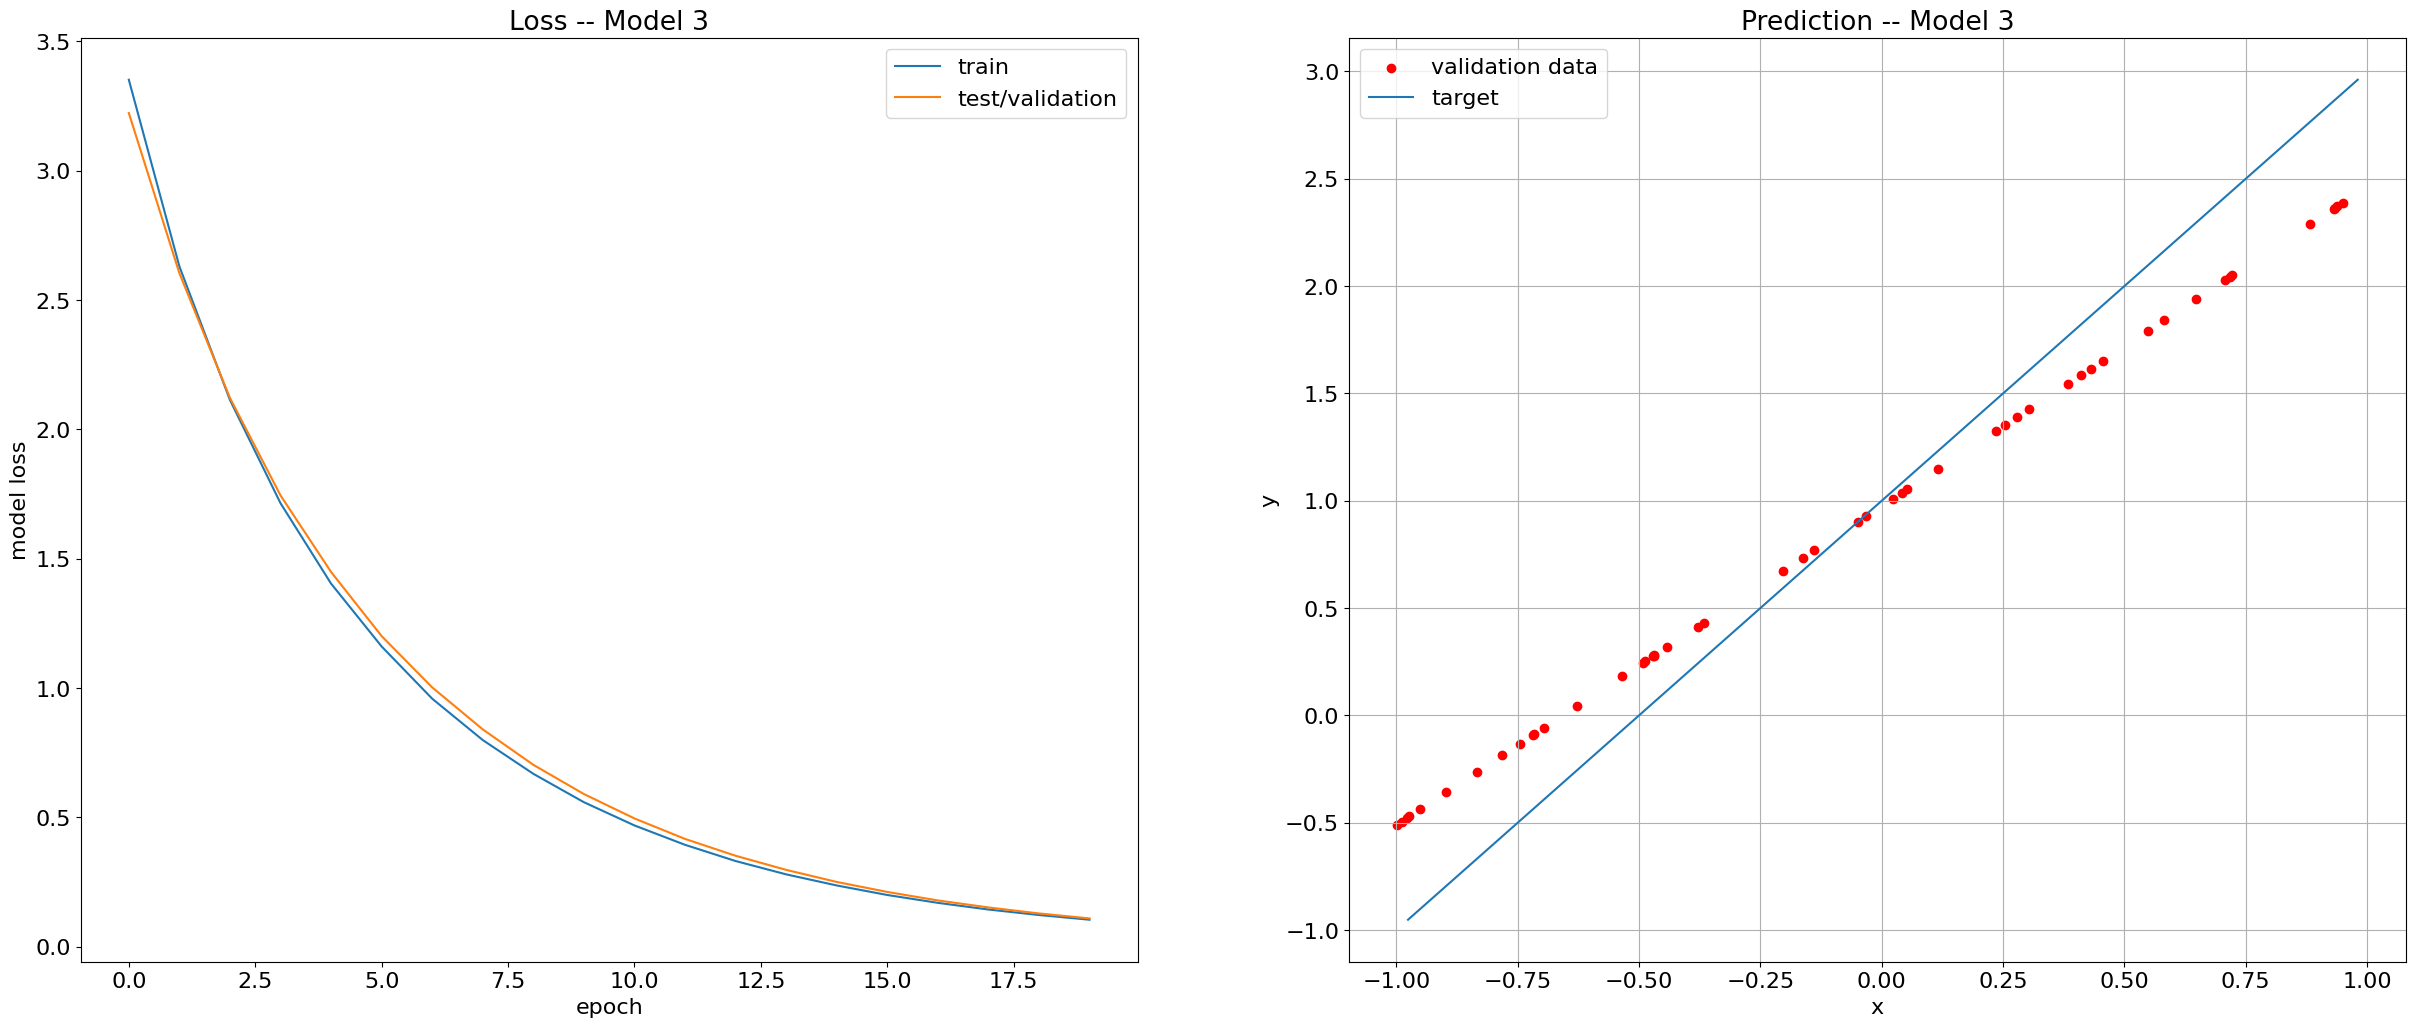

In [14]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Loss -- Model 3')

x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model.predict(x_predicted)
ax1.scatter(x_predicted, y_predicted,color='r', label="validation data")
ax1.plot(x_validation, y_target, label='target')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.set_title('Prediction -- Model 3')
ax1.grid(True)
plt.show()


For what concerns model 1 and 3, the plots point out that they are not able to provide a good fit of the data, even though the scenario improves in model 1. This may be due to the fact that in model 3 there was low variability ($\sigma$) and a small number of epochs and training data. In model 1 the variability and the dataset were augmented but the number of epochs remained the same, this resulted in a slight improvement of the prediction capability but not that satisfying. Model 2 seems to provide the best performance on the data, as in this case the variability was kept higher than in the other models and both the number of epochs and the size of the training data was kept sufficiently high but not with the risk to end up in overfitting. 

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [15]:
def polinomial(x):
    return (4-3*x-2*(x**2)+3*(x**3))

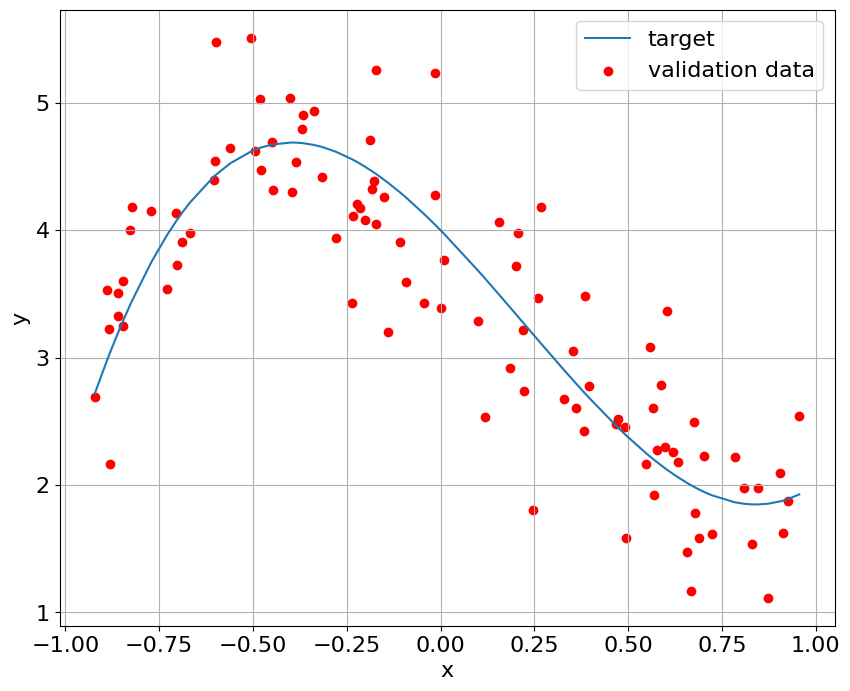

In [16]:
# generate training inputs
np.random.seed(0)
x_training = np.random.uniform(-1, 1, 3000)
x_validation = np.random.uniform(-1, 1, 100)
x_validation.sort()
y_target = polinomial(x_validation) # ideal (target) function

sigma = 0.5 # noise standard deviation
y_training = np.random.normal(polinomial(x_training), sigma) # actual measures from which we want to guess regression parameters
y_validation = np.random.normal(polinomial(x_validation), sigma)

# plot validation and target dataset
plt.plot(x_validation, y_target, label='target')
plt.scatter(x_validation, y_validation, color='r', label='validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In the following section of the notebook different models are investigated in order to fit the polinomial function considered. In particular, different models have different number of layers and number of neurons per layer, different activation functions and different optimizers. In some models there is a combination of different activation functions and optimizer. In this way, one can explore the space of the parameters of the models and investigate how the model behave. 

In [17]:
# Model 1 - SELU Adam
model_1 = tf.keras.Sequential()
model_1.add(Dense(30, input_shape=(1,), activation='selu'))
model_1.add(Dense(10, activation='selu'))
model_1.add(Dense(1, activation='selu'))
model_1.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 2 - ELU Nadam
model_2 = tf.keras.Sequential()
model_2.add(Dense(30, input_shape=(1,), activation='elu'))
model_2.add(Dense(10, activation='elu'))
model_2.add(Dense(1, activation='elu'))
model_2.compile(optimizer='nadam', loss='mse', metrics=['mse'])

# Model 3 - COMBINATION 
model_3 = tf.keras.Sequential()
model_3.add(Dense(30, input_shape=(1,), activation='elu'))
model_3.add(Dense(10, activation='selu'))
model_3.add(Dense(1, activation='relu'))
model_3.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 4 - COMBINATION
model_4 = tf.keras.Sequential()
model_4.add(Dense(30, input_shape=(1,), activation='elu'))
model_4.add(Dense(10, activation='selu'))
model_4.add(Dense(1, activation='relu'))
model_4.compile(optimizer='adam', loss='mae', metrics=['mse'])

# Model 5 -SIGMOID
model_5 = tf.keras.Sequential()
model_5.add(Dense(30, input_shape=(1,), activation='sigmoid'))
model_5.add(Dense(10, activation='sigmoid'))
model_5.add(Dense(1))
model_5.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 6 - TANH
model_6 = tf.keras.Sequential()
model_6.add(Dense(30, input_shape=(1,), activation='tanh'))
model_6.add(Dense(10, activation='tanh'))
model_6.add(Dense(1))
model_6.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 7 - COMBINATION pleteau and open bunds
model_7 = tf.keras.Sequential()
model_7.add(Dense(500, input_shape=(1,), activation='tanh'))
model_7.add(Dense(30, activation='sigmoid'))
model_7.add(Dense(10, activation='relu'))
model_7.add(Dense(1, activation='selu'))
model_7.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [18]:
#MODEL 1
history_1 = model_1.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_validation, y_validation),
          verbose=0)

In [19]:
#MODEL 2
history_2 = model_2.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_validation, y_validation),
          verbose=0)

In [20]:
#MODEL 3
history_3 = model_3.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_validation, y_validation),
          verbose=0)

In [21]:
#MODEL 4
history_4 = model_4.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_validation, y_validation),
          verbose=0)

In [22]:
#MODEL 5
history_5 = model_5.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_validation, y_validation),
          verbose=0)

In [23]:
#MODEL 6
history_6 = model_6.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_validation, y_validation),
          verbose=0)

In [24]:
#MODEL 7
history_7 = model_7.fit(x=x_training, y=y_training, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_validation, y_validation),
          verbose=0)

In [25]:
# evaluate Models
score_1 = model_1.evaluate(x_validation, y_validation, batch_size=32, verbose=0)
score_2 = model_2.evaluate(x_validation, y_validation, batch_size=32, verbose=0)
score_3 = model_3.evaluate(x_validation, y_validation, batch_size=32, verbose=0)
score_4 = model_4.evaluate(x_validation, y_validation, batch_size=32, verbose=0)
score_5 = model_5.evaluate(x_validation, y_validation, batch_size=32, verbose=0)
score_6 = model_6.evaluate(x_validation, y_validation, batch_size=32, verbose=0)
score_7 = model_7.evaluate(x_validation, y_validation, batch_size=32, verbose=0)

print('Model 1:')
print('\tTest loss:', score_1[0])
print('\tTest accuracy:', score_1[1])

print('Model 2:')
print('\tTest loss:', score_2[0])
print('\tTest accuracy:', score_2[1])

print('Model 3:')
print('\tTest loss:', score_3[0])
print('\tTest accuracy:', score_3[1])

print('Model 4:')
print('\tTest loss:', score_4[0])
print('\tTest accuracy:', score_4[1])

print('Model 5:')
print('\tTest loss:', score_5[0])
print('\tTest accuracy:', score_5[1])

print('Model 6:')
print('\tTest loss:', score_6[0])
print('\tTest accuracy:', score_6[1])

print('Model 7:')
print('\tTest loss:', score_7[0])
print('\tTest accuracy:', score_7[1])

Model 1:
	Test loss: 0.28220248222351074
	Test accuracy: 0.28220248222351074
Model 2:
	Test loss: 0.28403767943382263
	Test accuracy: 0.28403767943382263
Model 3:
	Test loss: 0.2722878158092499
	Test accuracy: 0.2722878158092499
Model 4:
	Test loss: 0.4019107520580292
	Test accuracy: 0.268364280462265
Model 5:
	Test loss: 0.3960568904876709
	Test accuracy: 0.3960568904876709
Model 6:
	Test loss: 0.2759283185005188
	Test accuracy: 0.2759283185005188
Model 7:
	Test loss: 0.26553383469581604
	Test accuracy: 0.26553383469581604


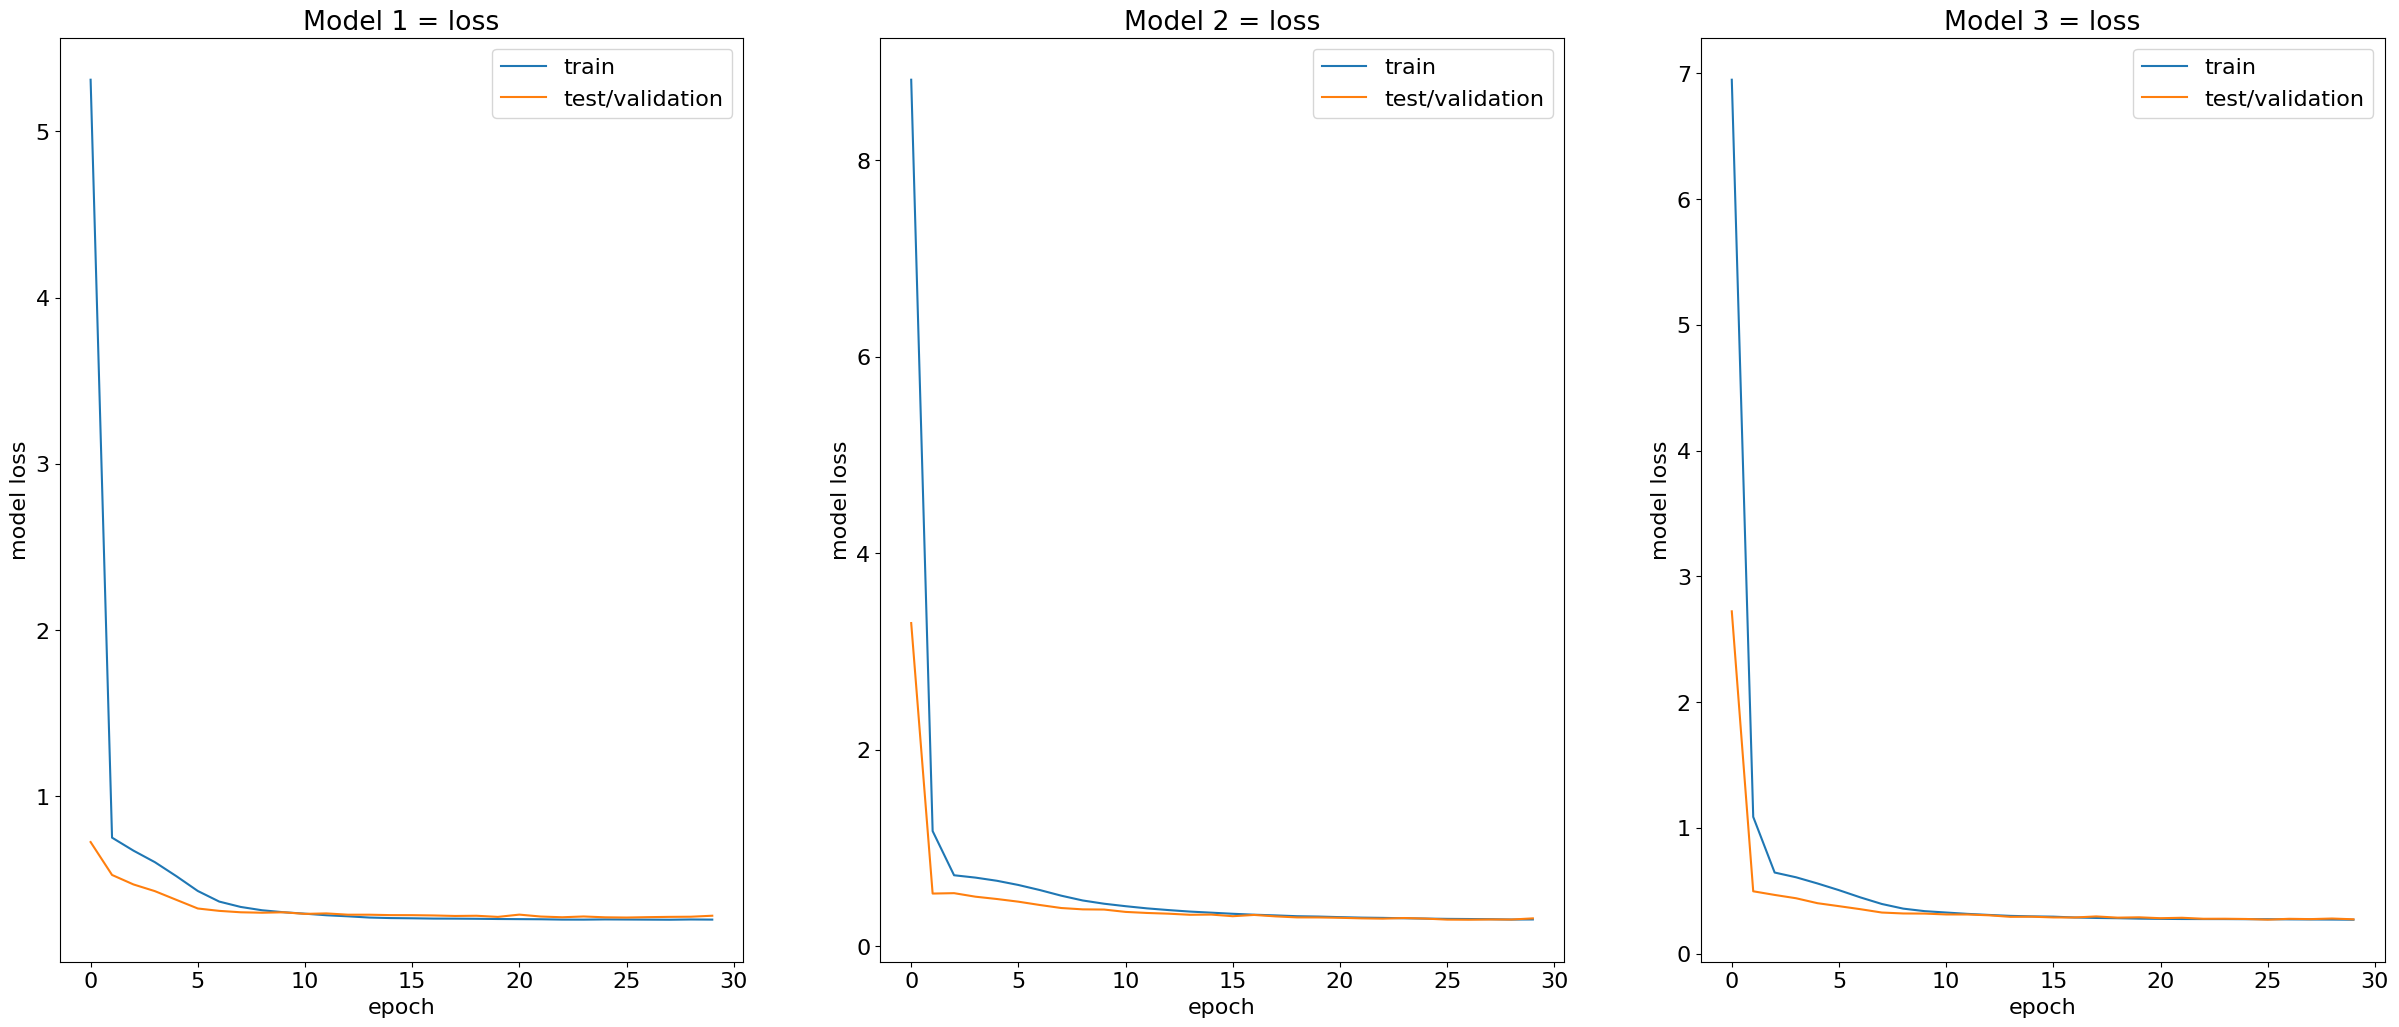

In [26]:
# RELU Actitivation
fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))

ax0.plot(history_1.history['loss'])
ax0.plot(history_1.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 1 = loss')

ax1.plot(history_2.history['loss'])
ax1.plot(history_2.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test/validation'], loc='best')
ax1.set_title('Model 2 = loss')

ax2.plot(history_3.history['loss'])
ax2.plot(history_3.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test/validation'], loc='best')
ax2.set_title('Model 3 = loss')

plt.show()


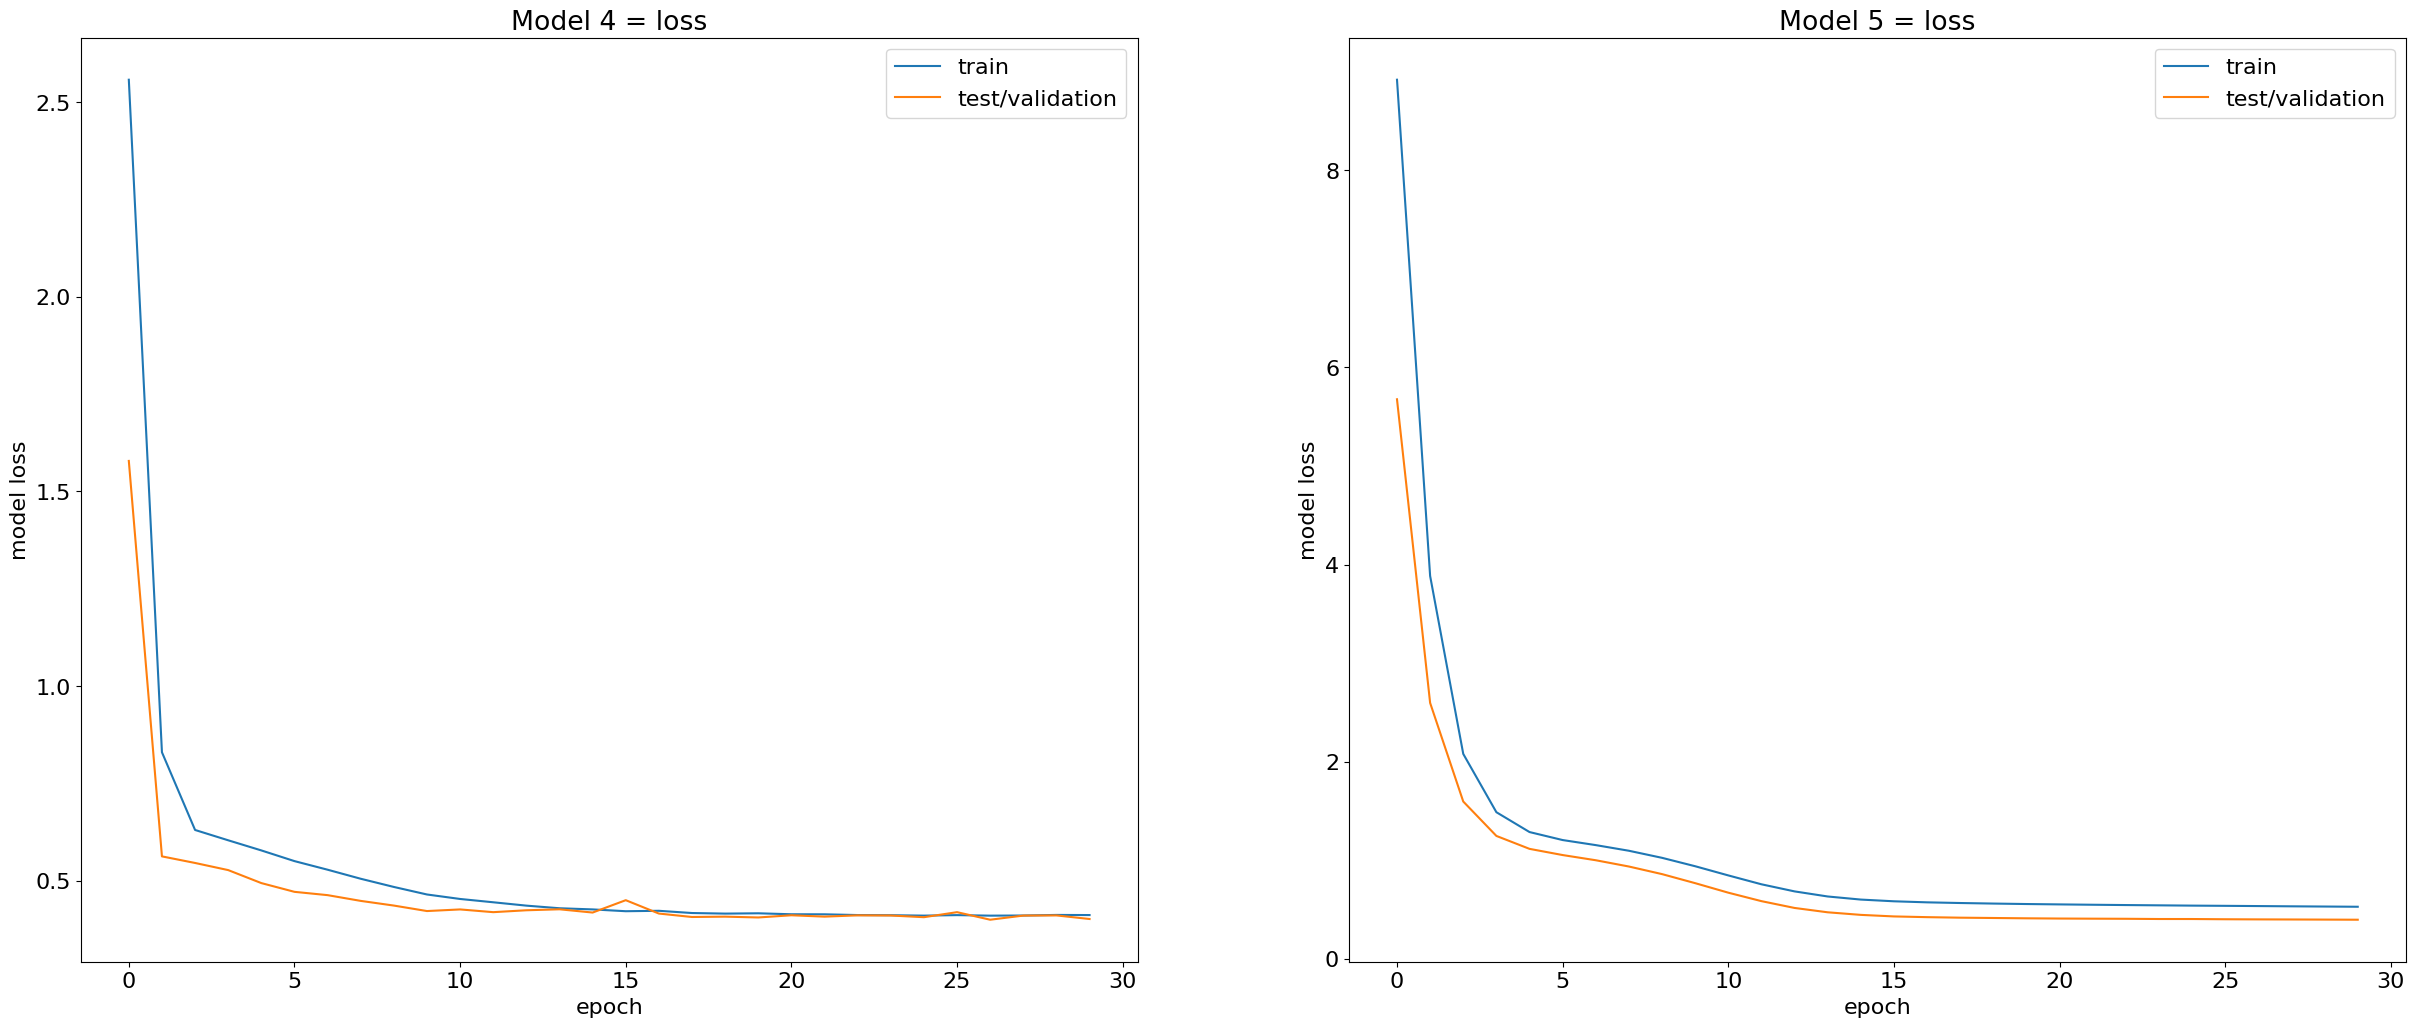

In [27]:
# Combination RELU, SELU, ELU
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history_4.history['loss'])
ax0.plot(history_4.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 4 = loss')

ax1.plot(history_5.history['loss'])
ax1.plot(history_5.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test/validation'], loc='best')
ax1.set_title('Model 5 = loss')

plt.show()

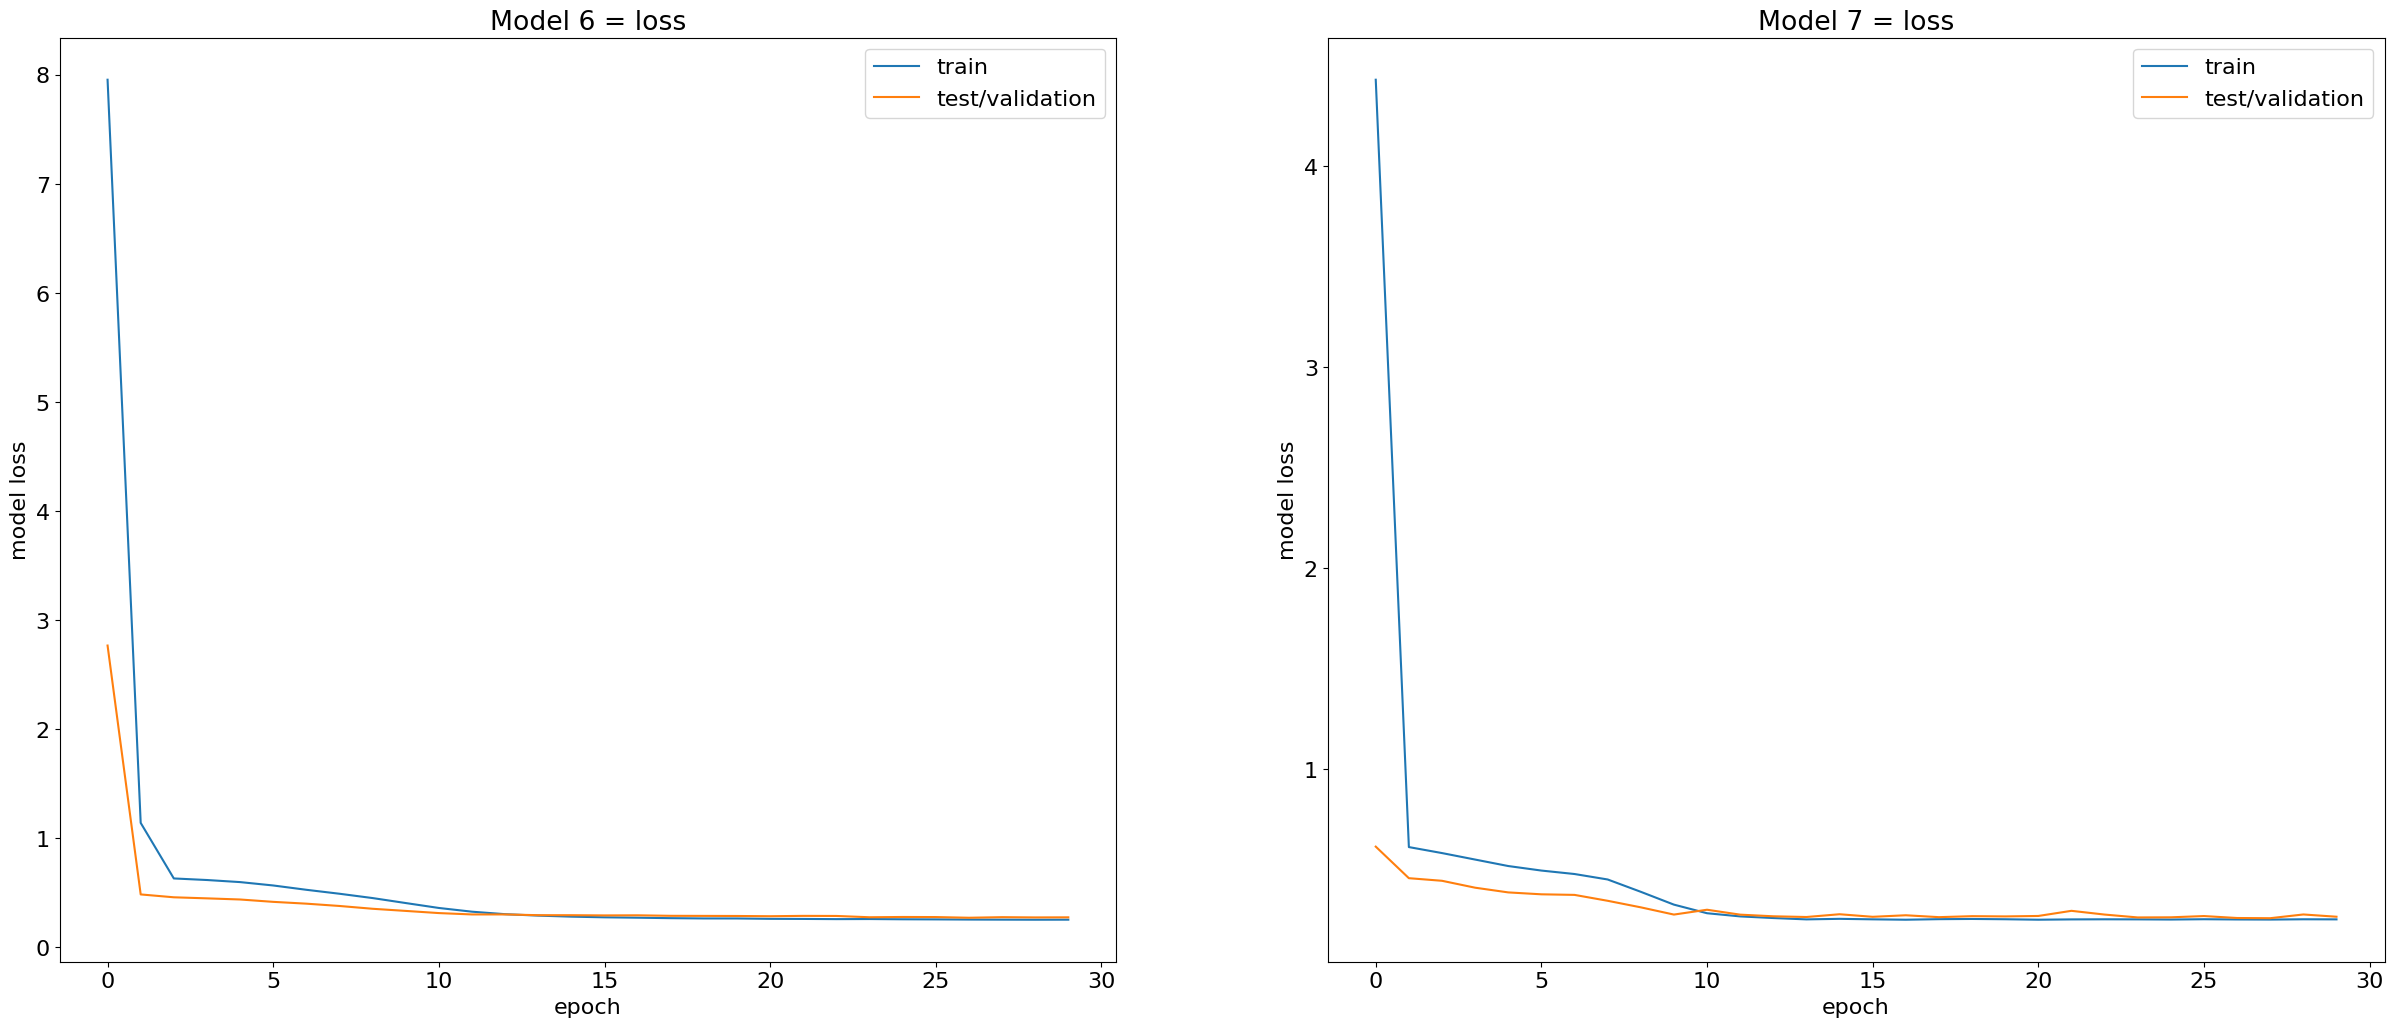

In [28]:
# Activation function with plateau
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history_6.history['loss'])
ax0.plot(history_6.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 6 = loss')

ax1.plot(history_7.history['loss'])
ax1.plot(history_7.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test/validation'], loc='best')
ax1.set_title('Model 7 = loss')

plt.show()


16/16 [==============================] - 0s 1ms/step


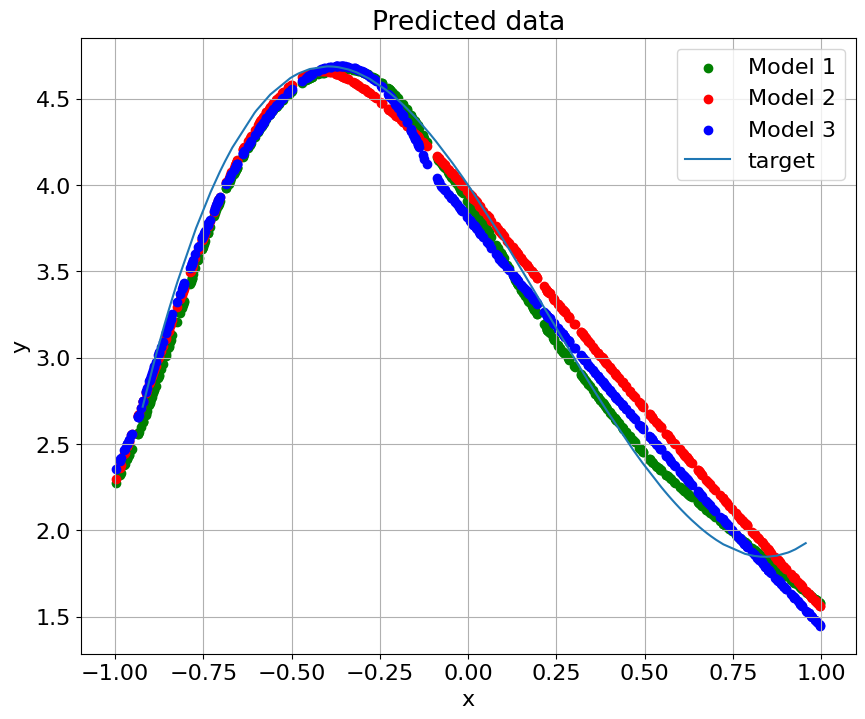

In [29]:
# Activation with no bounds
x_predicted = np.random.uniform(-1, 1, 500)
y_predicted_1 = model_1.predict(x_predicted)
y_predicted_2 = model_2.predict(x_predicted)
y_predicted_3 = model_3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_1,color='g', label="Model 1")
plt.scatter(x_predicted, y_predicted_2,color='r', label="Model 2")
plt.scatter(x_predicted, y_predicted_3,color='b', label="Model 3")
plt.plot(x_validation, y_target, label='target')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Predicted data')
plt.grid(True)
plt.show()

#### OUT OF BORDERS MODEL 1,2,3

16/16 [==============================] - 0s 1ms/step


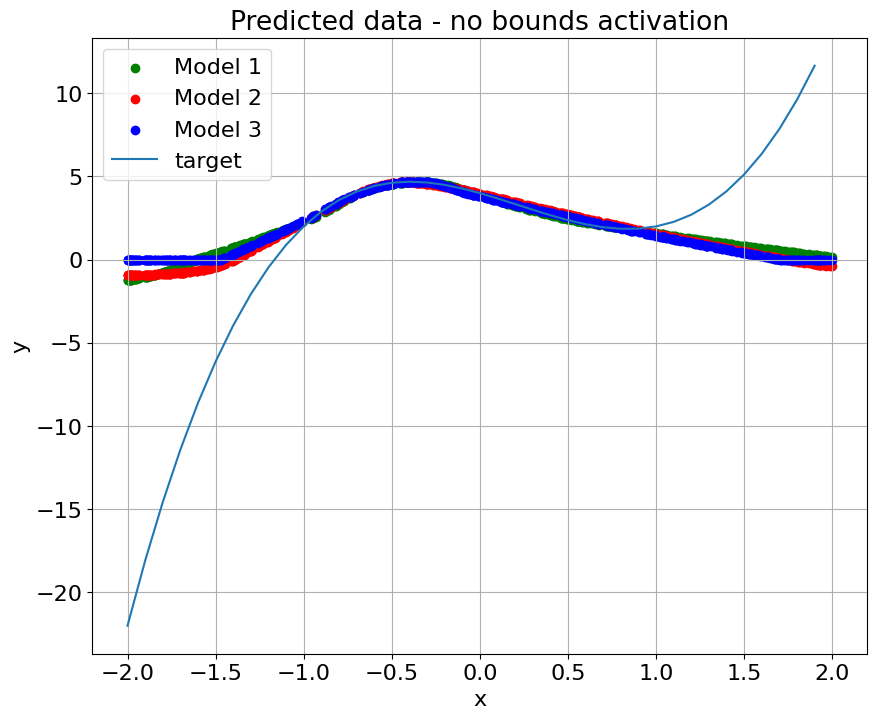

In [30]:
x = np.arange(-2., 2., 0.1)
x_predicted = np.random.uniform(-2., 2., 500)
y_predicted_1 = model_1.predict(x_predicted)
y_predicted_2 = model_2.predict(x_predicted)
y_predicted_3 = model_3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_1,color='g', label="Model 1")
plt.scatter(x_predicted, y_predicted_2,color='r', label="Model 2")
plt.scatter(x_predicted, y_predicted_3,color='b', label="Model 3")
plt.plot(x, polinomial(x), label='target')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Predicted data - no bounds activation')
plt.grid(True)
plt.show()

16/16 [==============================] - 0s 1ms/step


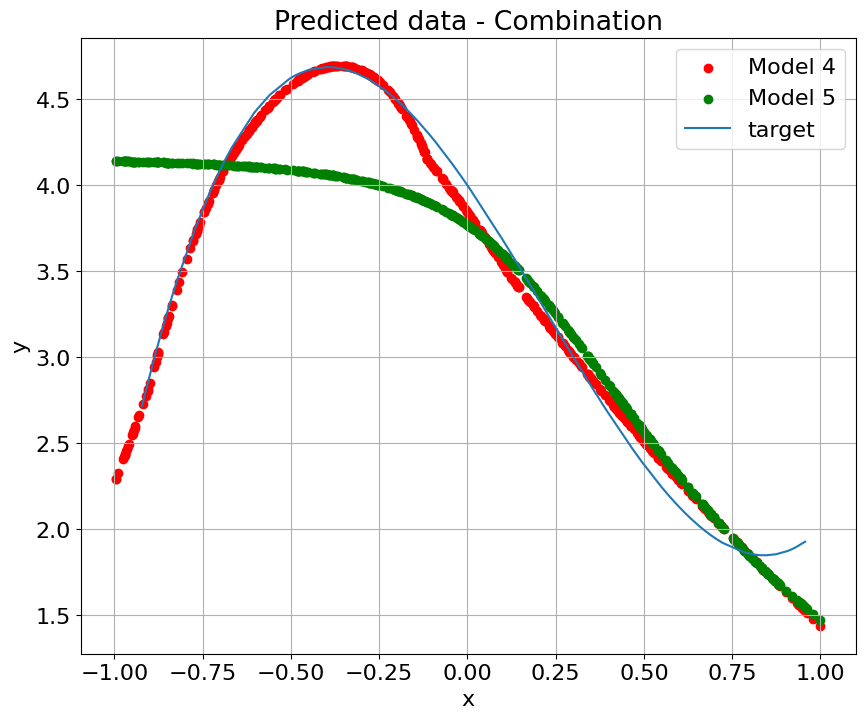

In [31]:
# Combination RELU, ELU, SELU Actitivation
x_predicted = np.random.uniform(-1, 1, 500)
y_predicted_4 = model_4.predict(x_predicted)
y_predicted_5 = model_5.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_4,color='r', label="Model 4")
plt.scatter(x_predicted, y_predicted_5,color='g', label="Model 5")
plt.plot(x_validation, y_target, label='target')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Predicted data - Combination')
plt.grid(True)
plt.show()


#### OUT OF BORDERS MODEL 4,5

16/16 [==============================] - 0s 2ms/step


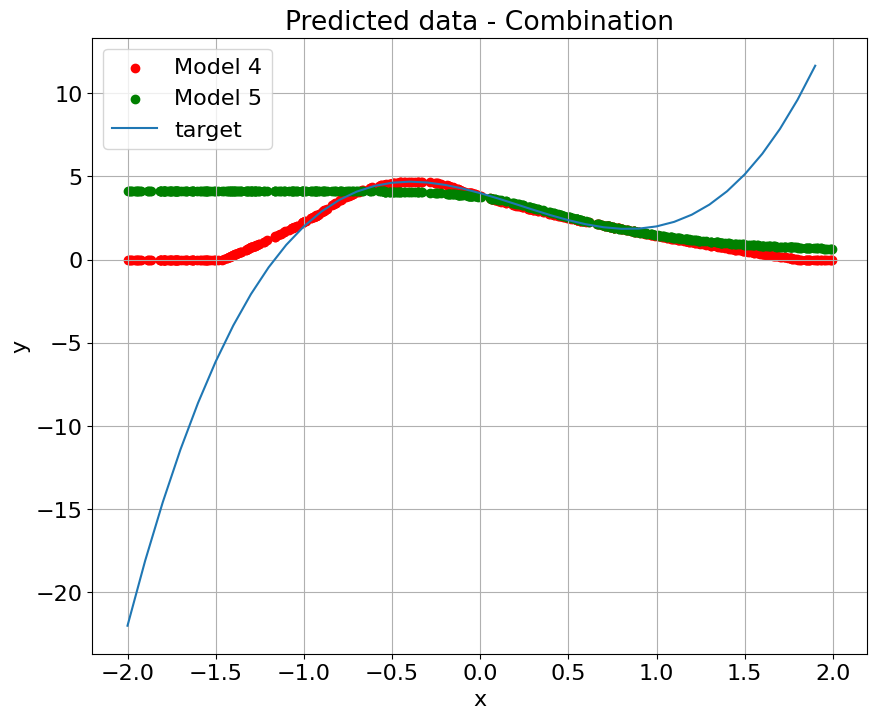

In [32]:
# Combination RELU, ELU, SELU Actitivation
x = np.arange(-2., 2., 0.1)
x_predicted = np.random.uniform(-2., 2., 500)
y_predicted_4 = model_4.predict(x_predicted)
y_predicted_5 = model_5.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_4,color='r', label="Model 4")
plt.scatter(x_predicted, y_predicted_5,color='g', label="Model 5")
plt.plot(x, polinomial(x), label='target')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Predicted data - Combination')
plt.grid(True)
plt.show()


16/16 [==============================] - 0s 2ms/step


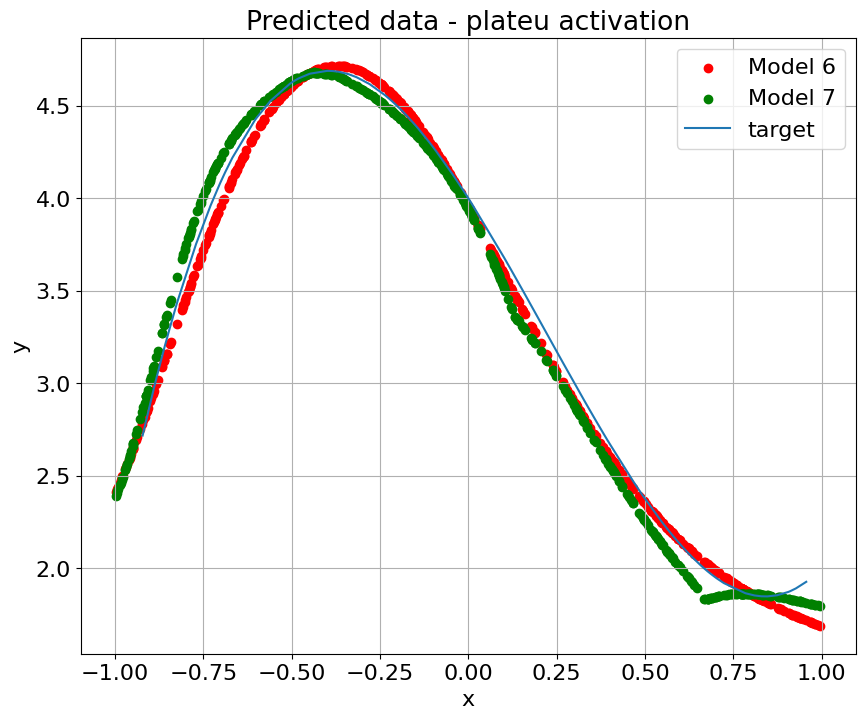

In [33]:
# Activation function with plateau
x_predicted = np.random.uniform(-1, 1, 500)
y_predicted_6 = model_6.predict(x_predicted)
y_predicted_7 = model_7.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_6,color='r', label="Model 6")
plt.scatter(x_predicted, y_predicted_7,color='g', label="Model 7")
plt.plot(x_validation, y_target, label='target')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Predicted data - plateu activation')
plt.grid(True)
plt.show()

#### OUT OF BORDERS MODEL 6,7

16/16 [==============================] - 0s 2ms/step


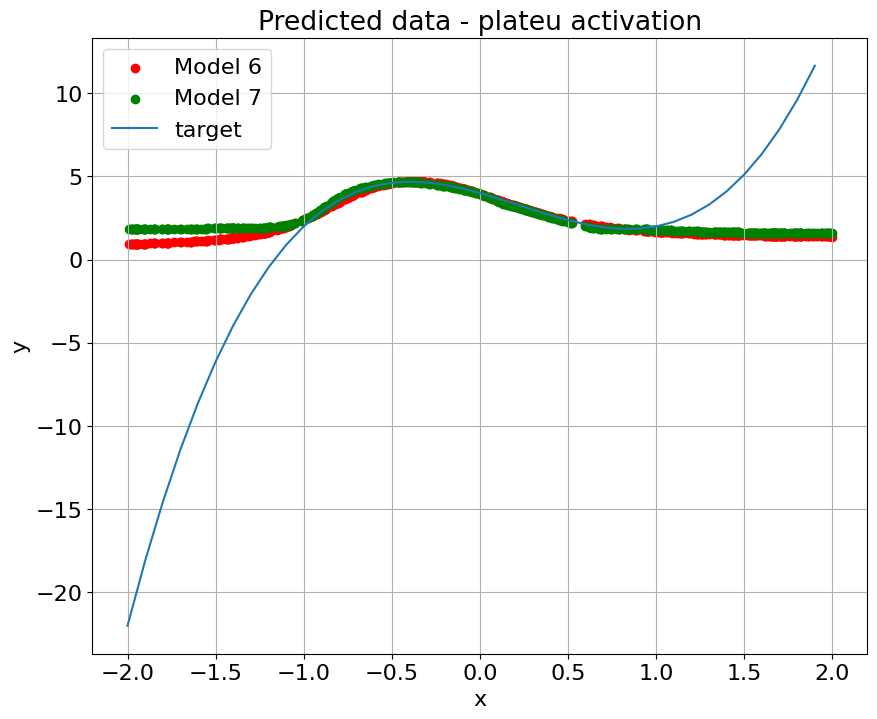

In [34]:
# Activation function with plateau
x = np.arange(-2., 2., 0.1)
x_predicted = np.random.uniform(-2., 2., 500)
y_predicted_6 = model_6.predict(x_predicted)
y_predicted_7 = model_7.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_6,color='r', label="Model 6")
plt.scatter(x_predicted, y_predicted_7,color='g', label="Model 7")
plt.plot(x, polinomial(x), label='target')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Predicted data - plateu activation')
plt.grid(True)
plt.show()

Models 1,2,3 seems to have a good prediction capability except for the tail, in which all of them fails evidently (with particular regard for model 3 that presents a linear trend). For the combination graph (model 4) the same considerations hold. For models 5,6,7, in which the activation functions are plateu-type (sigmoid and tanh) and a combination of these and RELU/SELU, the predictions agree with the target function also in the tail for model 6 and 7, while in model 5 they fails completely. Therefore one must say that the best performance is given by model 7 and it must be noted that in this NN the first layer is composed of 500 neurons with tanh activation function: this gives depth to the NN and therefore the model performs better than the others.  
For all the models investigated, the predictions outside the interval considered $[-1, 1]$ fail (the interval was extended to $[-2, 2])$. 

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [35]:
def sin(x,y):
    return np.sin(x**2 + y**2)

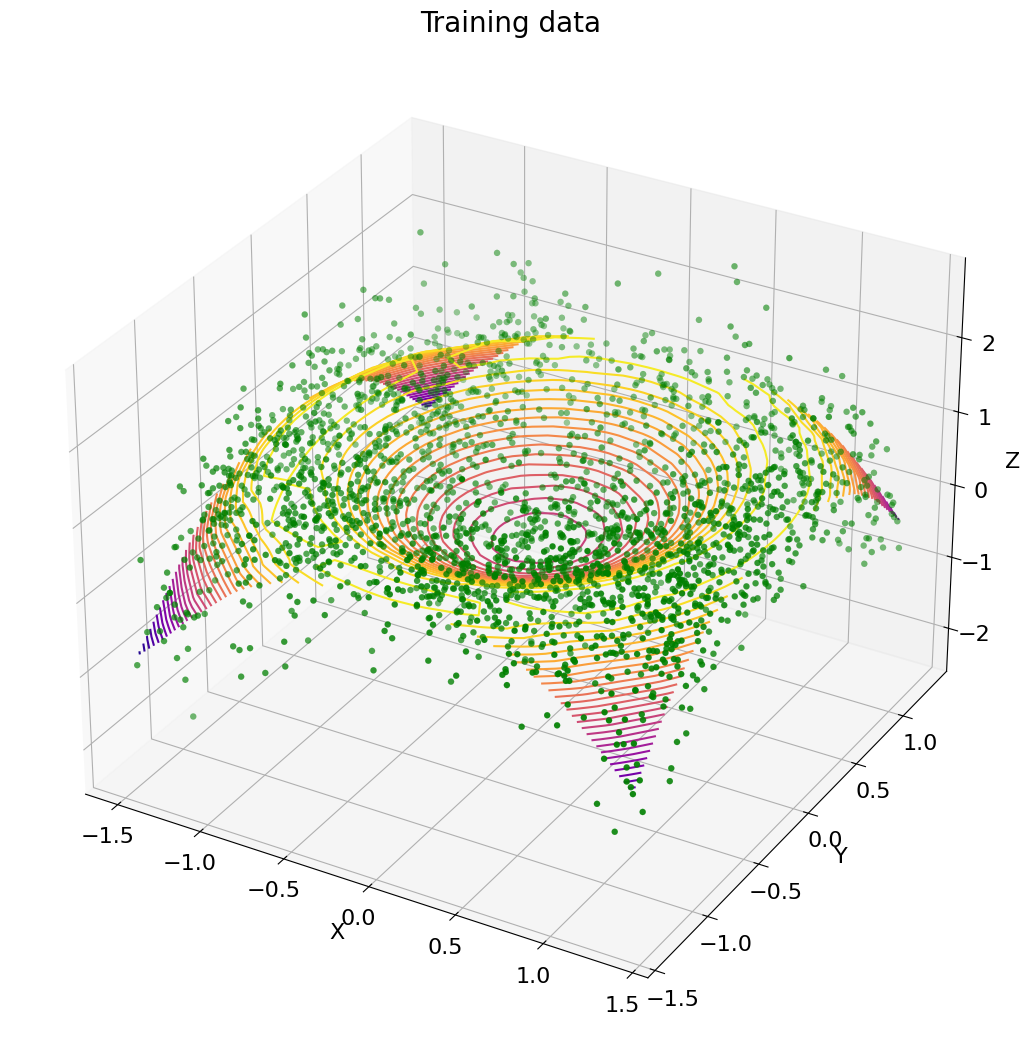

In [36]:
from mpl_toolkits import mplot3d

# generate training inputs
np.random.seed(0)
data_training = np.random.uniform(-1.5, 1.5, size=(10000, 2))
data_validation = np.random.uniform(-1.5, 1.5, size=(1000, 2))
data_validation.sort()
target = sin(data_validation[0], data_validation[1])

sigma = 0.5 # noise standard deviation
f_training = np.random.normal(sin(data_training[:,0], data_training[:,1]), sigma)
f_validation = np.random.normal(sin(data_validation[:,0], data_validation[:,1]), sigma)

test_points = np.random.uniform(-1.5, 1.5, size=(2, 50))
test_points.sort()
x, y = np.meshgrid(test_points[0], test_points[1])
z_target= sin(x,y)
z_validation = np.random.normal(sin(x, y), sigma)

fig = plt.figure(figsize=(18,13))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z_validation, color='green', linewidth=0.1)
ax.contour3D(x, y, z_target, 30, cmap='plasma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Training data', fontsize=20)
plt.grid(True)

Given the complexity of the function, a NN with 4 layers of 30, 20, 10 and a 1 neurons with RELU activation function was designed to address the problem. 

In [37]:
# Model
model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(2,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [38]:
# fit the Model 1 using training dataset
history = model.fit(x=data_training, y=f_training, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_validation, f_validation),
          verbose=0)

In [39]:
score = model.evaluate(data_validation, f_validation, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.2583 - mse: 0.2583

Test loss: 0.2583366632461548
Test accuracy: 0.2583366632461548


Text(0.5, 1.0, 'Model - loss')

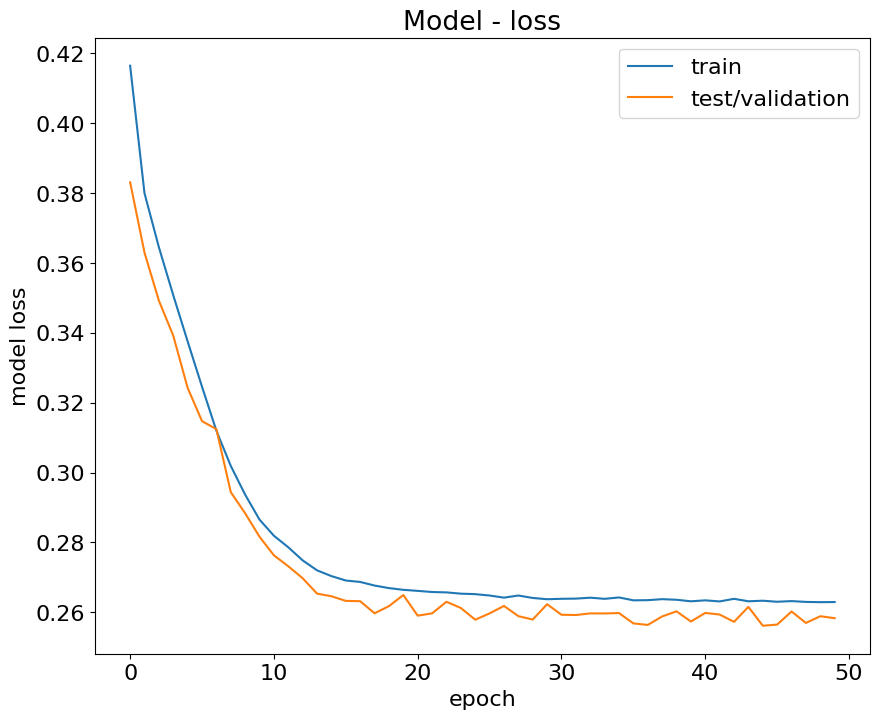

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.title('Model - loss')

32/32 [==============================] - 0s 1ms/step


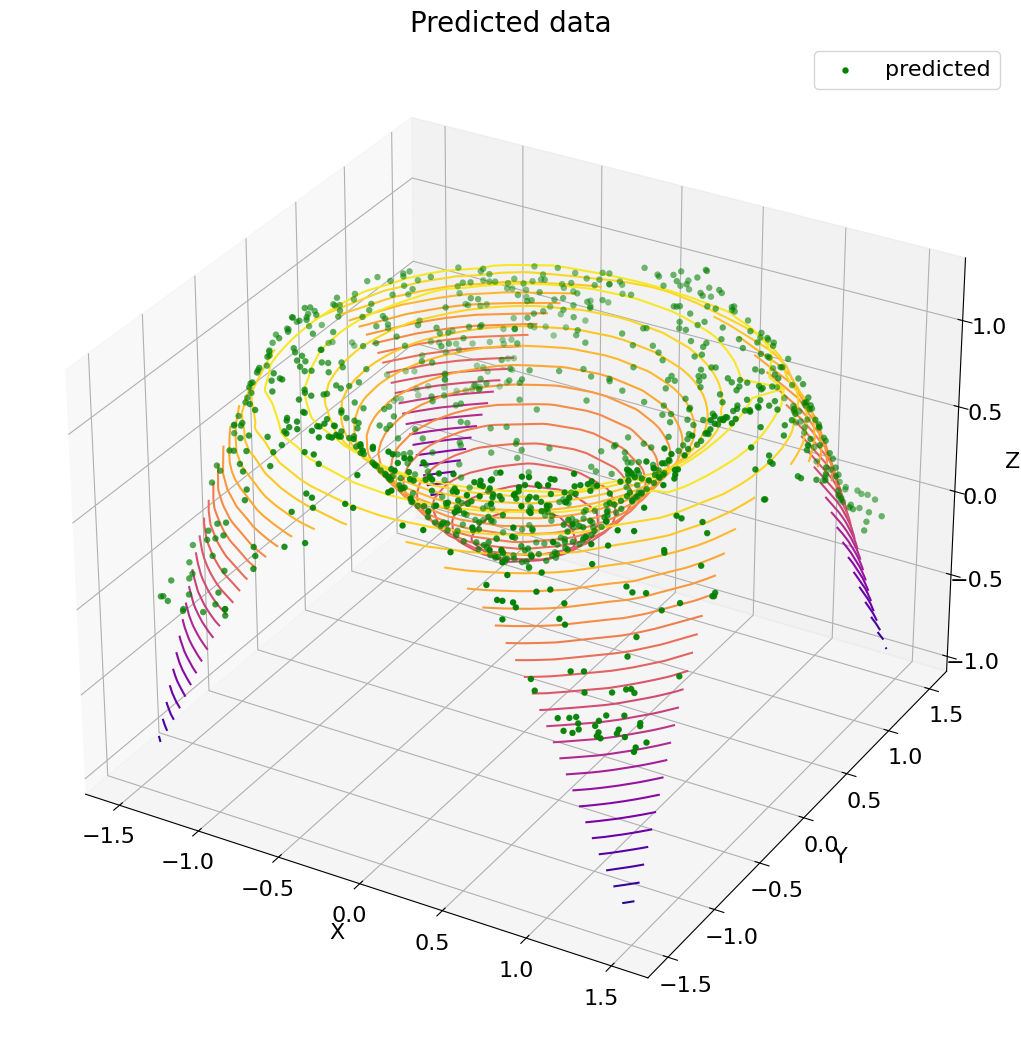

In [41]:
data_predicted = np.random.uniform(-1.5, 1.5,size=(1000,2))
f_predicted = model.predict(data_predicted)

test_points = np.random.uniform(-1.5, 1.5, size=(2, 50))
test_points.sort()
x, y = np.meshgrid(test_points[0], test_points[1])
z_target= sin(x,y)

fig = plt.figure(figsize=(18,13))
ax = plt.axes(projection='3d')
ax.scatter(data_predicted[:,0], data_predicted[:,1], f_predicted, color='green', linewidth=0.1, label='predicted')
ax.contour3D(x, y, z_target, 30, cmap='plasma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
ax.set_title('Predicted data', fontsize=20)
plt.grid(True)

The 3D plot shows a good agreement between the prediction and the target function. 